## Producing the Heat Maps from Team 7

#### First, we load in some necessary libraries as well as the data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
crime = pd.read_csv(r"C:\Users\Jose\Downloads\Crime_Data_from_2020_to_Present_20250321.csv")

#### Next we concatenate instances of "TIME OCC" that have less than 4 digits (e.g. 600, 1, et cetera) to have 4 digits by adding "0" or "00" or "000" at the front and then attaining the first two digits for an "hour" feature; this is done by treating "TIME OCC" as a string

In [ ]:
crime['TIME OCC'] = crime['TIME OCC'].astype(str).apply(lambda x: '0' + x if len(x) == 3 else ('00' + x if len(x) == 2 else ('000' + x if len(x) == 1 else x)))
crime["hour"] = crime['TIME OCC'].astype(str).str[:2]

#### Turn this into a numeric feature as we formerly treated it as a string

In [ ]:
crime["hour"] = crime["hour"].astype(int)

##### In order to get a measurement for how "bright" a time of day might be, we use a kernel (Gaussian) and set a decay rate with a center at noon (that way it is considered to have the highest "sunny" values closer to noon and to be less "bright" further from 1200)

In [ ]:
from sklearn.metrics.pairwise import rbf_kernel

crime["sunny"] = rbf_kernel(crime[["hour"]], [[12]], gamma=0.03)

#### Next we obtain the instances in crime that have meaningful coordinate data along with being the subset of crime we are looking at

In [ ]:
geo_crime_full = crime[(crime["LAT"] != 0) &
                                (crime["LON"] != 0) &
                                ((crime["Crm Cd Desc"] == "ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT") | (crime["Crm Cd Desc"] == "CRIMINAL HOMICIDE") | (crime["Crm Cd Desc"] == "RAPE, ATTEMPTED") | (crime["Crm Cd Desc"] == "RAPE, FORCIBLE"))]

#### The following produces the most bundled map: it has data points for all our considered crimes (assault with deadly weapon, criminal homicide, rape) for all times of the day

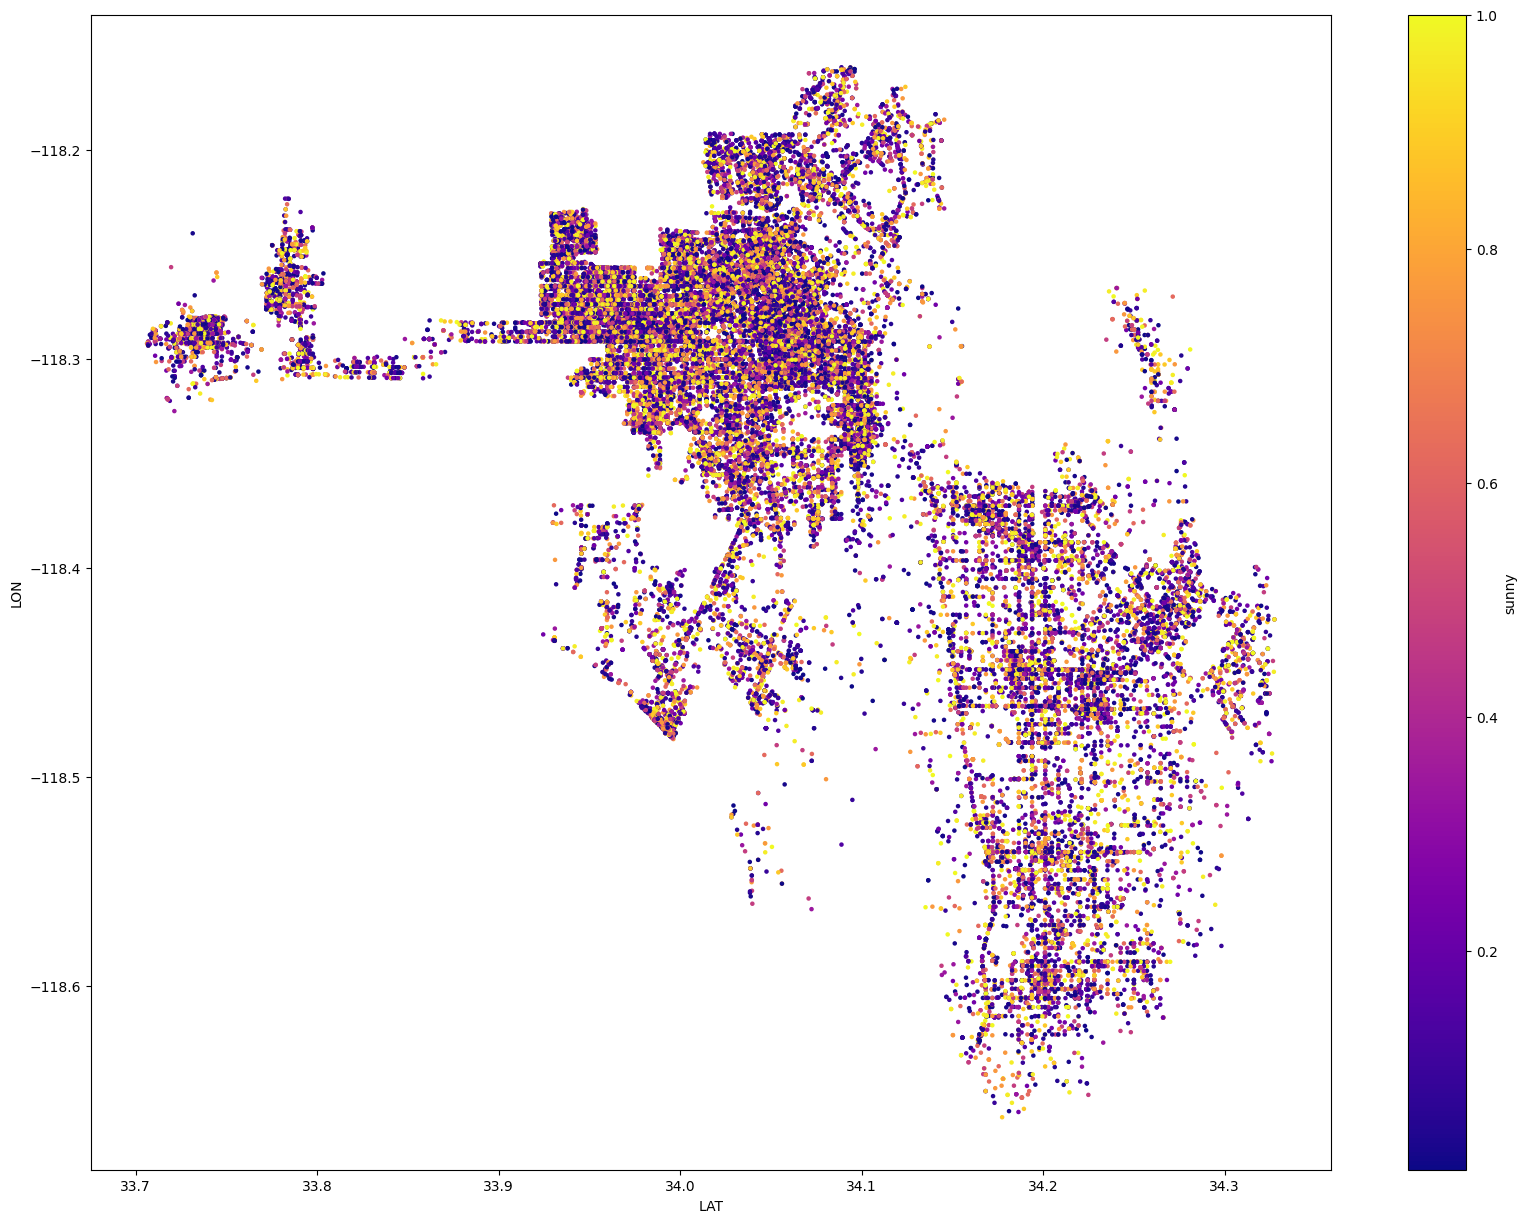

In [ ]:
geo_crime_full.plot(kind = "scatter",
               x = "LAT",
               y = "LON",
               s = 5,
               c = "sunny",
               cmap = "plasma",
               colorbar = True,
               legend = True,
               figsize = (20, 15))
plt.savefig("stats140xp_la_map_full_full.png")

#### Next we produce the graph that has the former (all crimes) but for a susbet of time, here it being from 05:00 AM to 12:00 PM

#### Note that what we do is subset for the appropriate crimes using an operator equivalent to "or" while also verifying that it has the right "hour" feature, set the map to be a scatter plot, utilize the coordinates of "LAT" and "LON", or latitude and longitude, for x and y, respectively, set the sizing parameter "s" equivalent to 5, use our developed feature "sunny" for the "heat" of the heatmap while also using the "plasma" color-scheme in "cmap". Very importantly, we set "vmin" to be 0 and "vmax" to be 1 because these set the possible range for the "heat variable", here "sunny" - if this were not used, it would treat the sunniest point in a subsetted dataframe as always being yellow or "1" and the lowest point as being blue or "0", but we want the range to stay the same throughout each and every map. Also, we set a colorbar and legend to be visible.

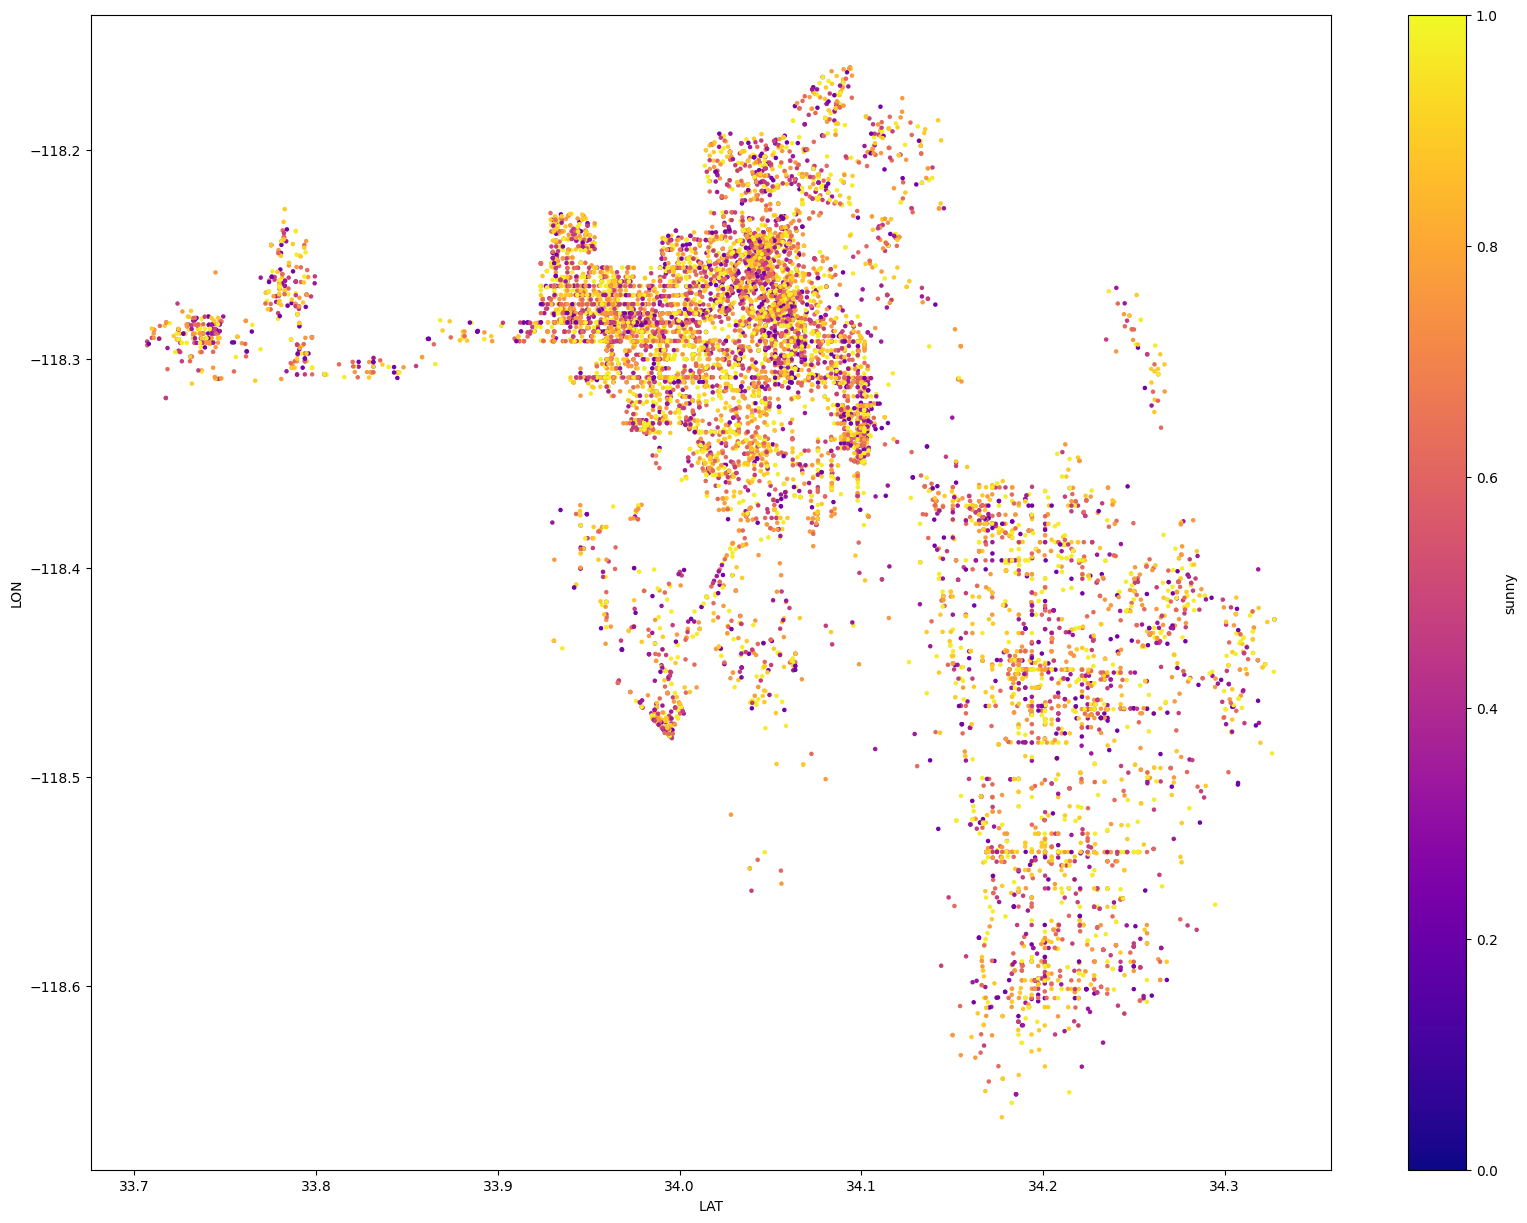

In [ ]:
geo_crime_full[((geo_crime_full["Crm Cd Desc"] == "ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT") | (geo_crime_full["Crm Cd Desc"] == "CRIMINAL HOMICIDE") | (geo_crime_full["Crm Cd Desc"] == "RAPE, ATTEMPTED") | (geo_crime_full["Crm Cd Desc"] == "RAPE, FORCIBLE")) &
               (((geo_crime_full["hour"] >= 5) & (geo_crime_full["hour"] < 12)) | (geo_crime_full["TIME OCC"] == 1200))].plot(kind = "scatter",
               x = "LAT",
               y = "LON",
               s = 5,
               c = "sunny",
               cmap = "plasma",
               vmin = 0,
               vmax = 1,
               colorbar = True,
               legend = True,
               figsize = (20, 15))
plt.savefig("stats140xp_la_map_full_5_to_12.png")

#### This next cell produces a geospatial heatmap for all crimes, but instead for the hours of 12:00 PM to 08:00 PM. Again, we use the "vmin" and "vmax" to be set to the minimum and maximum possible for the "sunny" feature, respectively. Otherwise, our heatmap would have a shifted range.

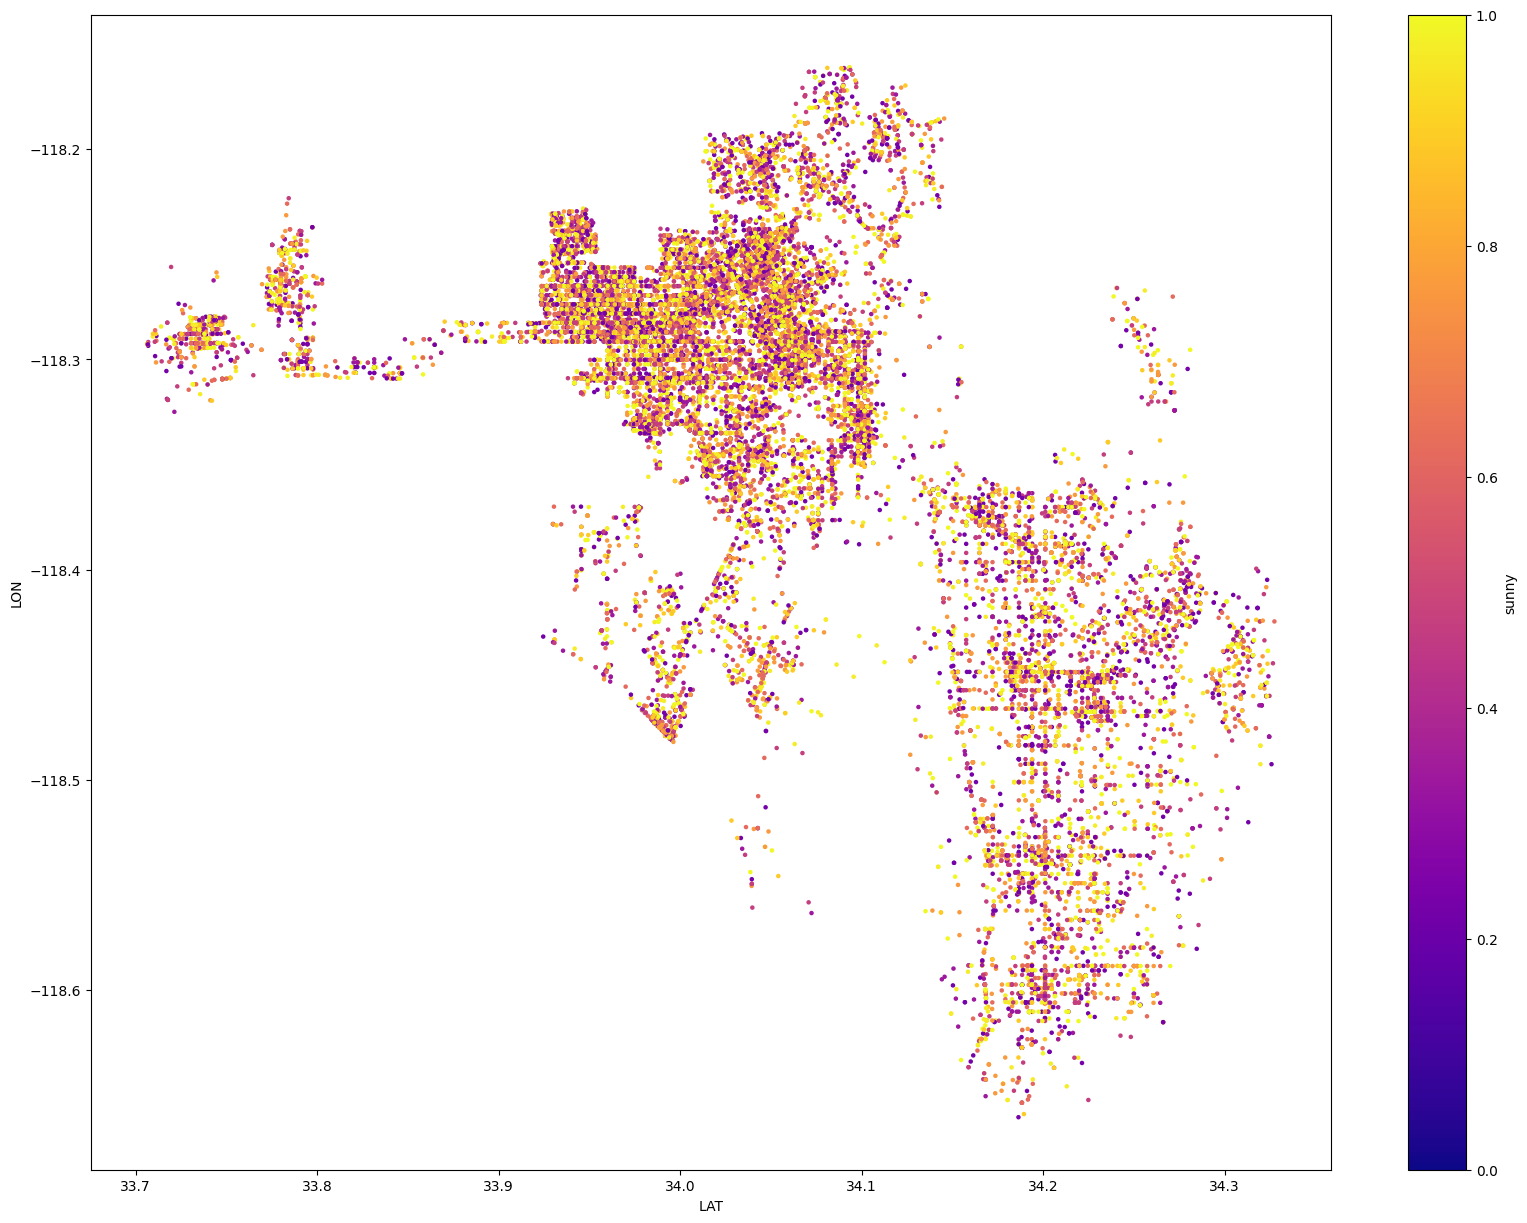

In [ ]:
geo_crime_full[((geo_crime_full["Crm Cd Desc"] == "ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT") | (geo_crime_full["Crm Cd Desc"] == "CRIMINAL HOMICIDE") | (geo_crime_full["Crm Cd Desc"] == "RAPE, ATTEMPTED") | (geo_crime_full["Crm Cd Desc"] == "RAPE, FORCIBLE")) &
               (((geo_crime_full["hour"] >= 12) & (geo_crime_full["hour"] < 20)) | (geo_crime_full["TIME OCC"] == 2000))].plot(kind = "scatter",
               x = "LAT",
               y = "LON",
               s = 5,
               c = "sunny",
               cmap = "plasma",
               vmin = 0,
               vmax = 1,
               colorbar = True,
               legend = True,
               figsize = (20, 15))
plt.savefig("labeld_stats140xp_la_map_full_12_to_8.png")

#### And the next cell does the same, but for the hours of 08:00 PM to 05:00 AM

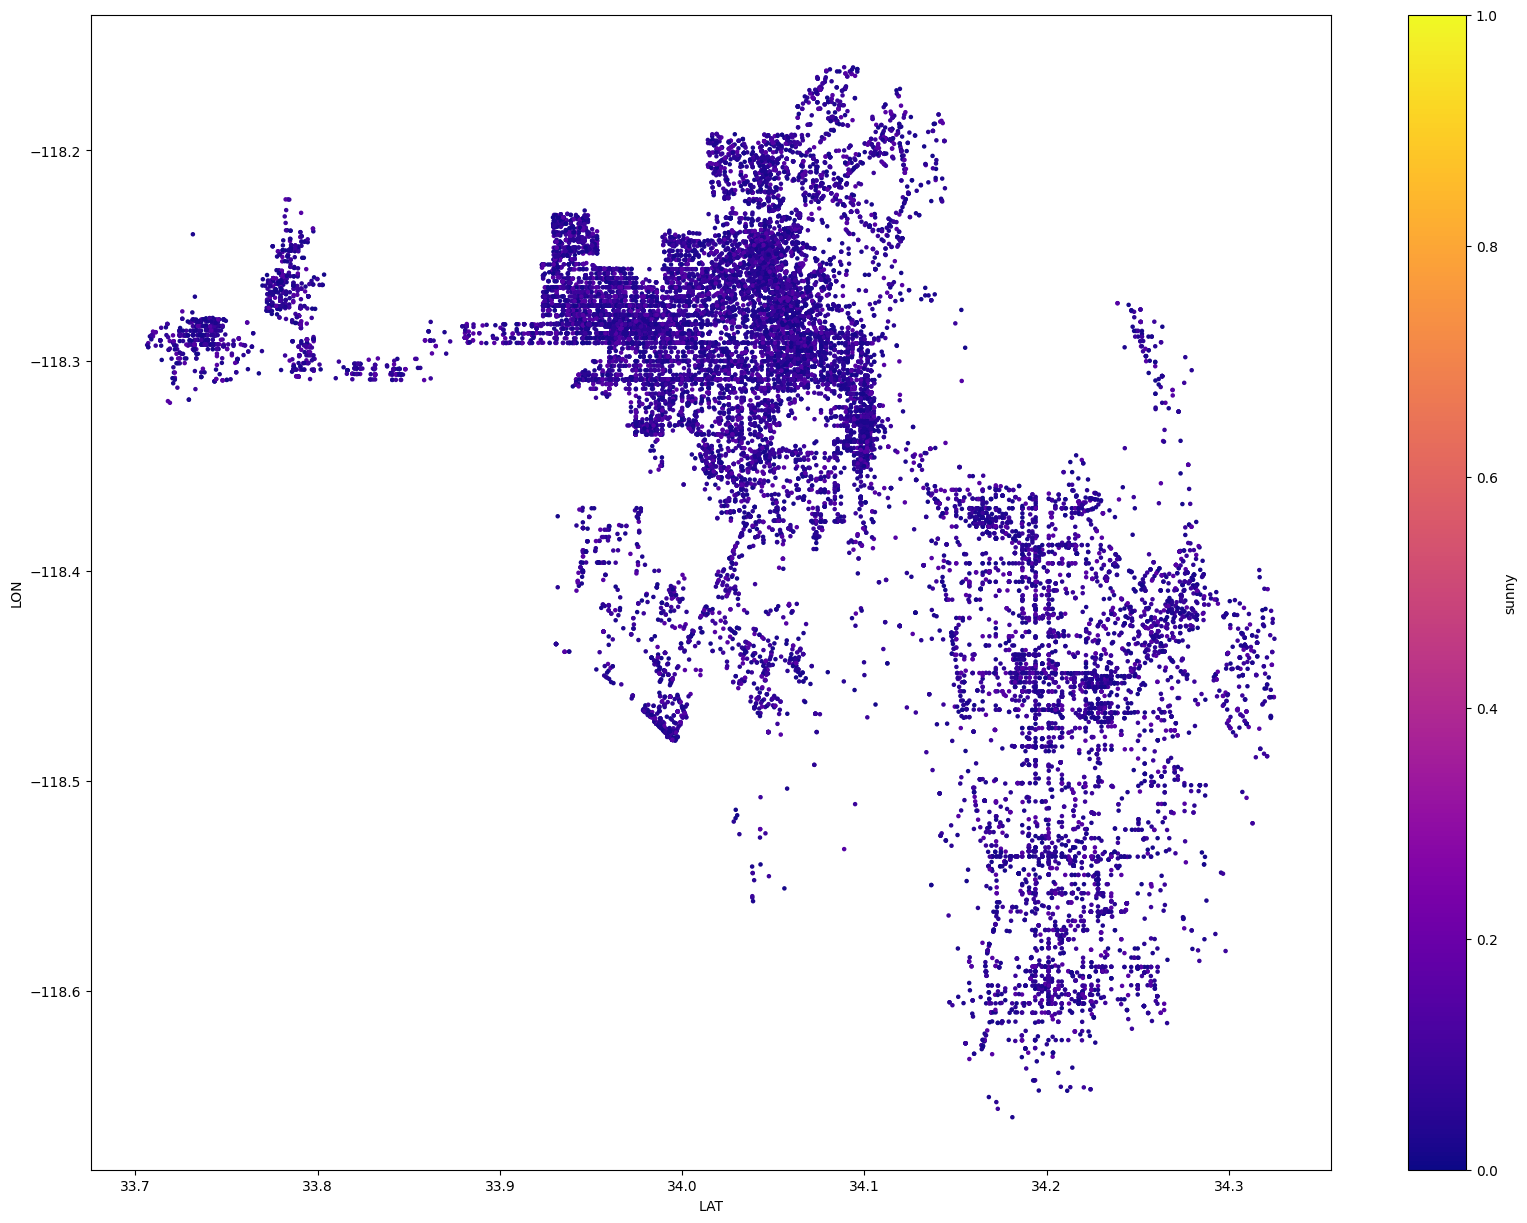

In [ ]:
geo_crime_full[((geo_crime_full["Crm Cd Desc"] == "ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT") | (geo_crime_full["Crm Cd Desc"] == "CRIMINAL HOMICIDE") | (geo_crime_full["Crm Cd Desc"] == "RAPE, ATTEMPTED") | (geo_crime_full["Crm Cd Desc"] == "RAPE, FORCIBLE")) &
               (((geo_crime_full["hour"] >= 20) | (geo_crime_full["hour"] < 5)) | (geo_crime_full["TIME OCC"] == 500))].plot(kind = "scatter",
               x = "LAT",
               y = "LON",
               s = 5,
               c = "sunny",
               cmap = "plasma",
               colorbar = True,
               vmin = 0,
               vmax = 1,
               legend = True,
               figsize = (20, 15))
plt.savefig("stats140xp_la_map_full_8_to_5.png")

#### Now, as we have completed a full day and done each subset of the day for all the possible crimes, we focus on individual crimes while keeping the windows of time of (1) all day, (2) 05:00 AM to 12:00 PM, (3) 12:00 PM to 08:00 PM, (4) 08:00 PM to 05:00 AM (essentially, always done in this order in this Jupyter Notebook)

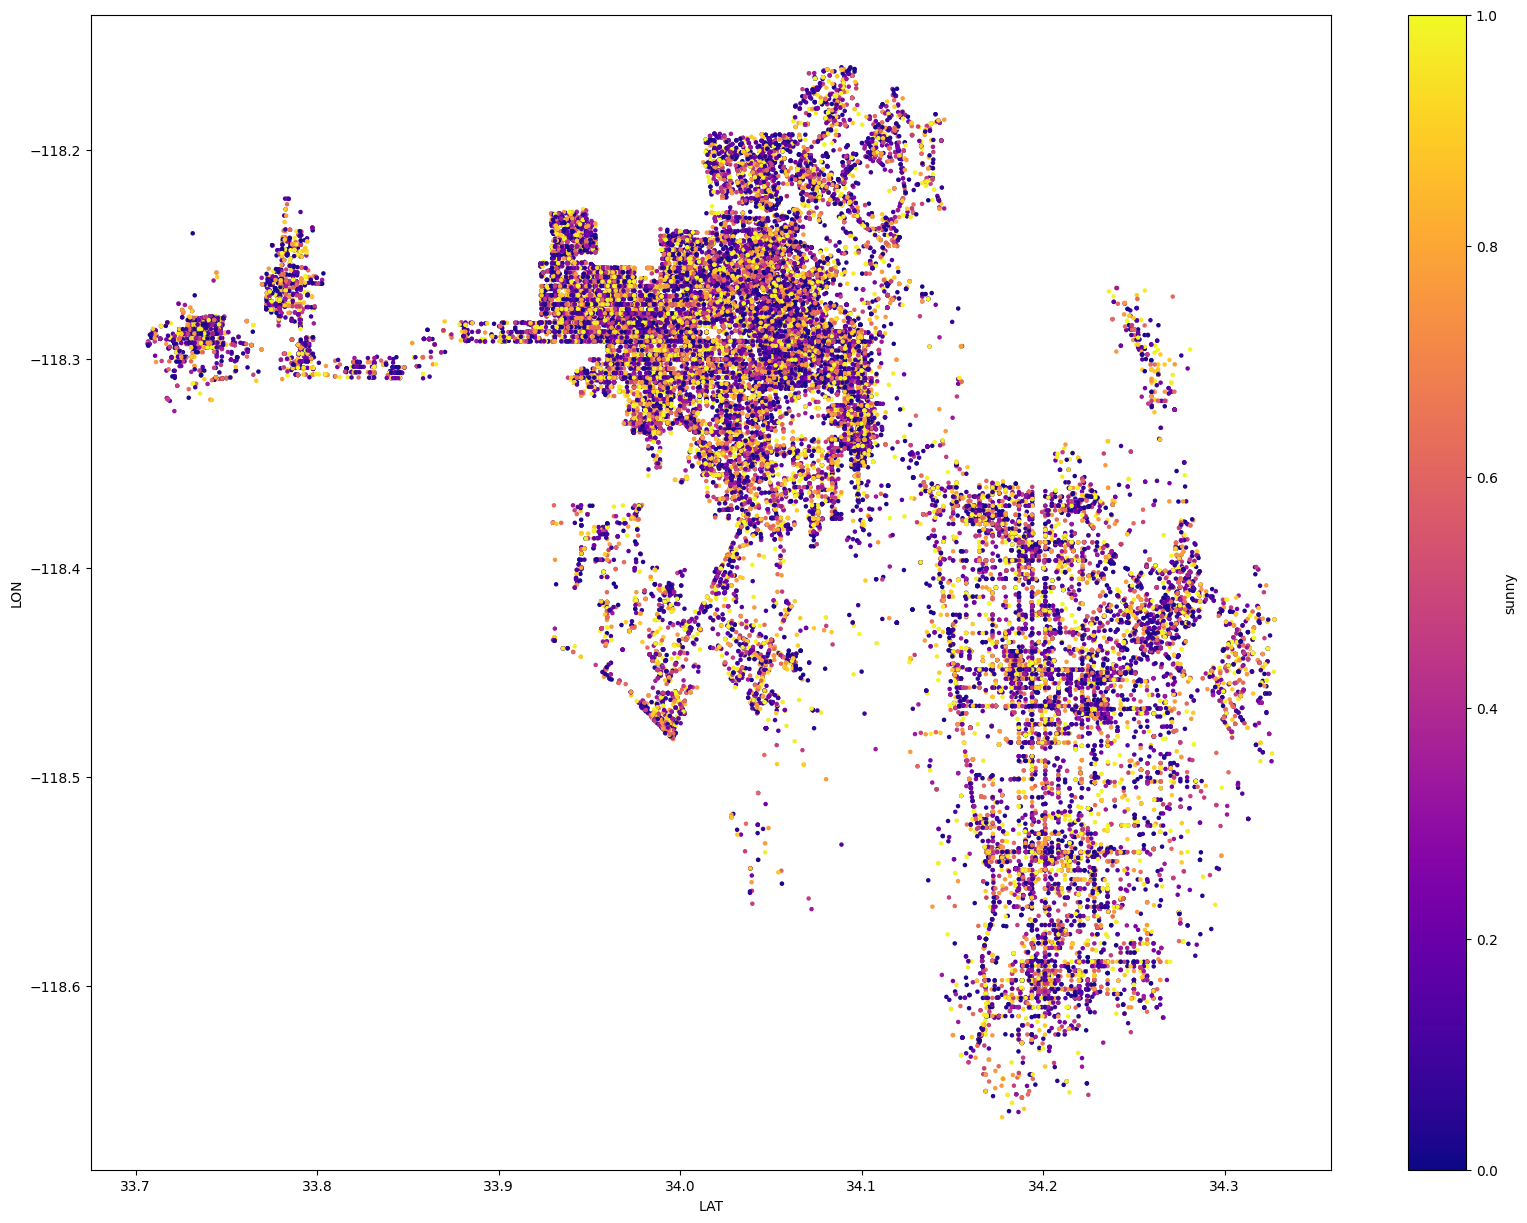

In [ ]:
geo_crime_full[((geo_crime_full["Crm Cd Desc"] == "ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT"))].plot(kind = "scatter",
               x = "LAT",
               y = "LON",
               s = 5,
               c = "sunny",
               cmap = "plasma",
               colorbar = True,
               vmin = 0,
               vmax = 1,
               legend = True,
               figsize = (20, 15))
plt.savefig("stats140xp_la_map_weapon_full.png")

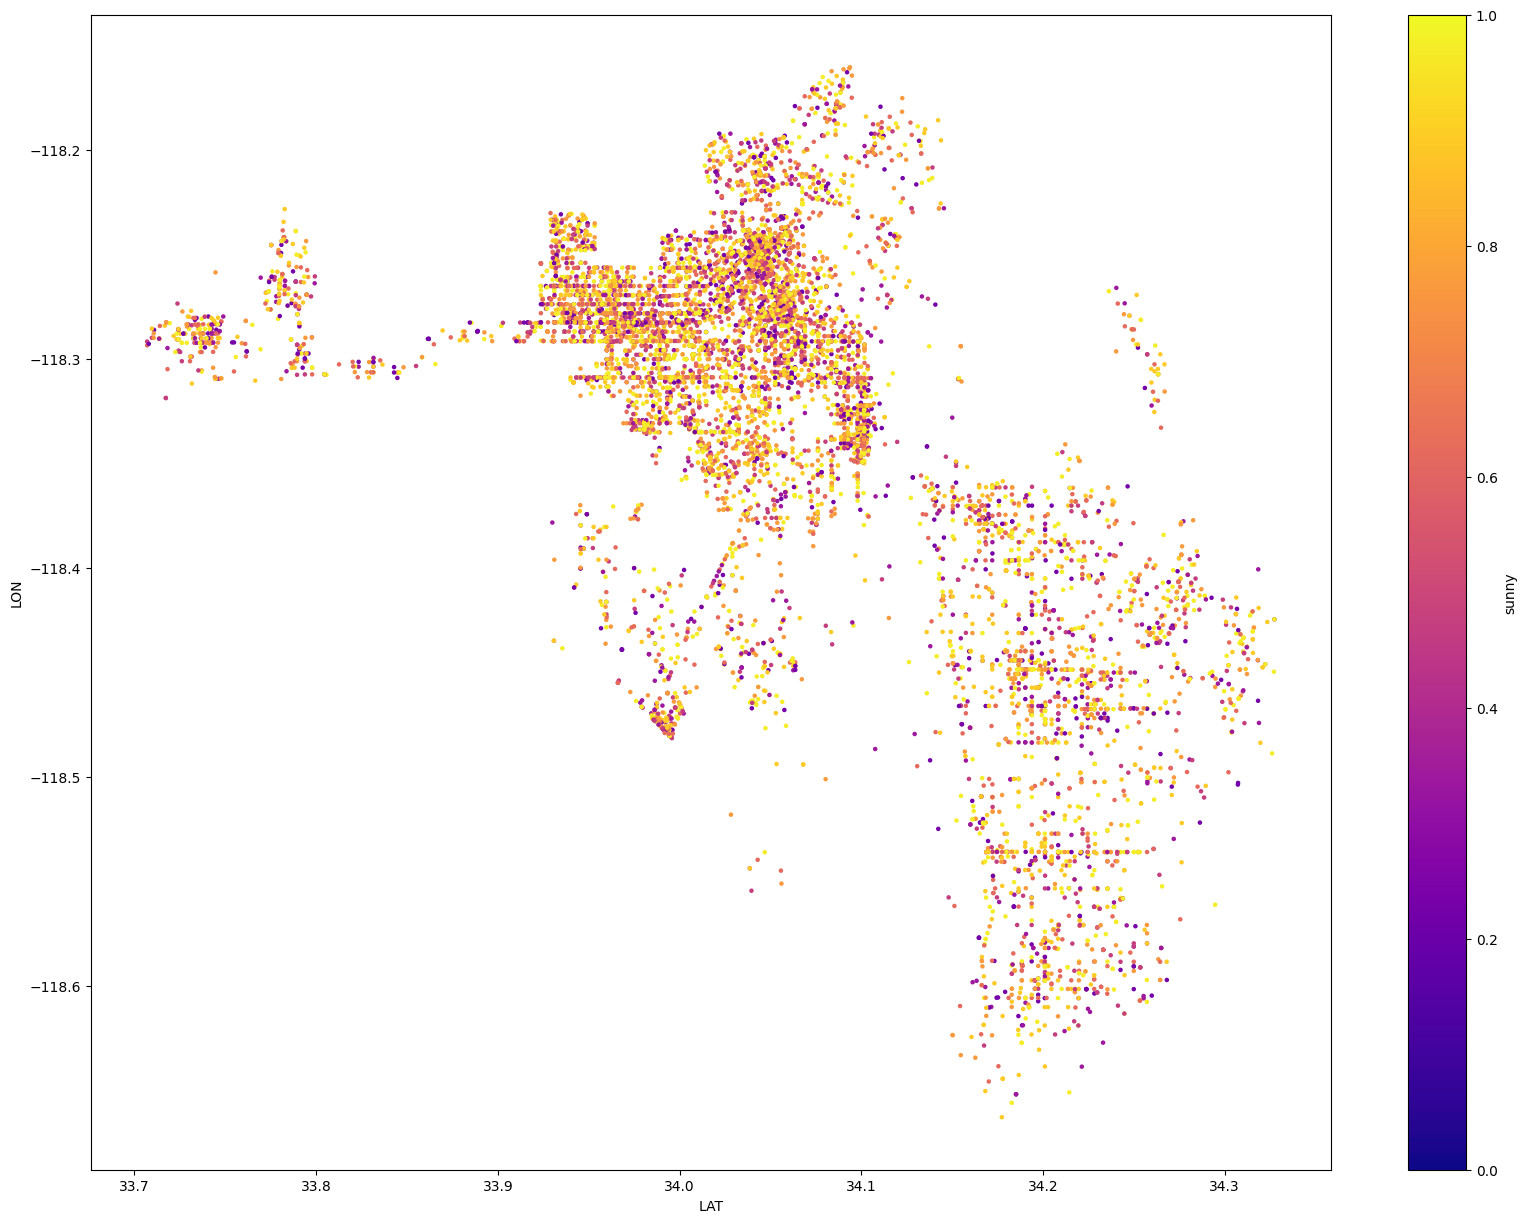

In [ ]:
geo_crime_full[(geo_crime_full["Crm Cd Desc"] == "ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT") &
               (((geo_crime_full["hour"] >= 5) & (geo_crime_full["hour"] < 12)) | (geo_crime_full["TIME OCC"] == 1200))].plot(kind = "scatter",
               x = "LAT",
               y = "LON",
               s = 5,
               c = "sunny",
               cmap = "plasma",
               colorbar = True,
               vmin = 0,
               vmax = 1,
               legend = True,
               figsize = (20, 15))
plt.savefig("stats140xp_la_map_weapon_5_to_12.png")

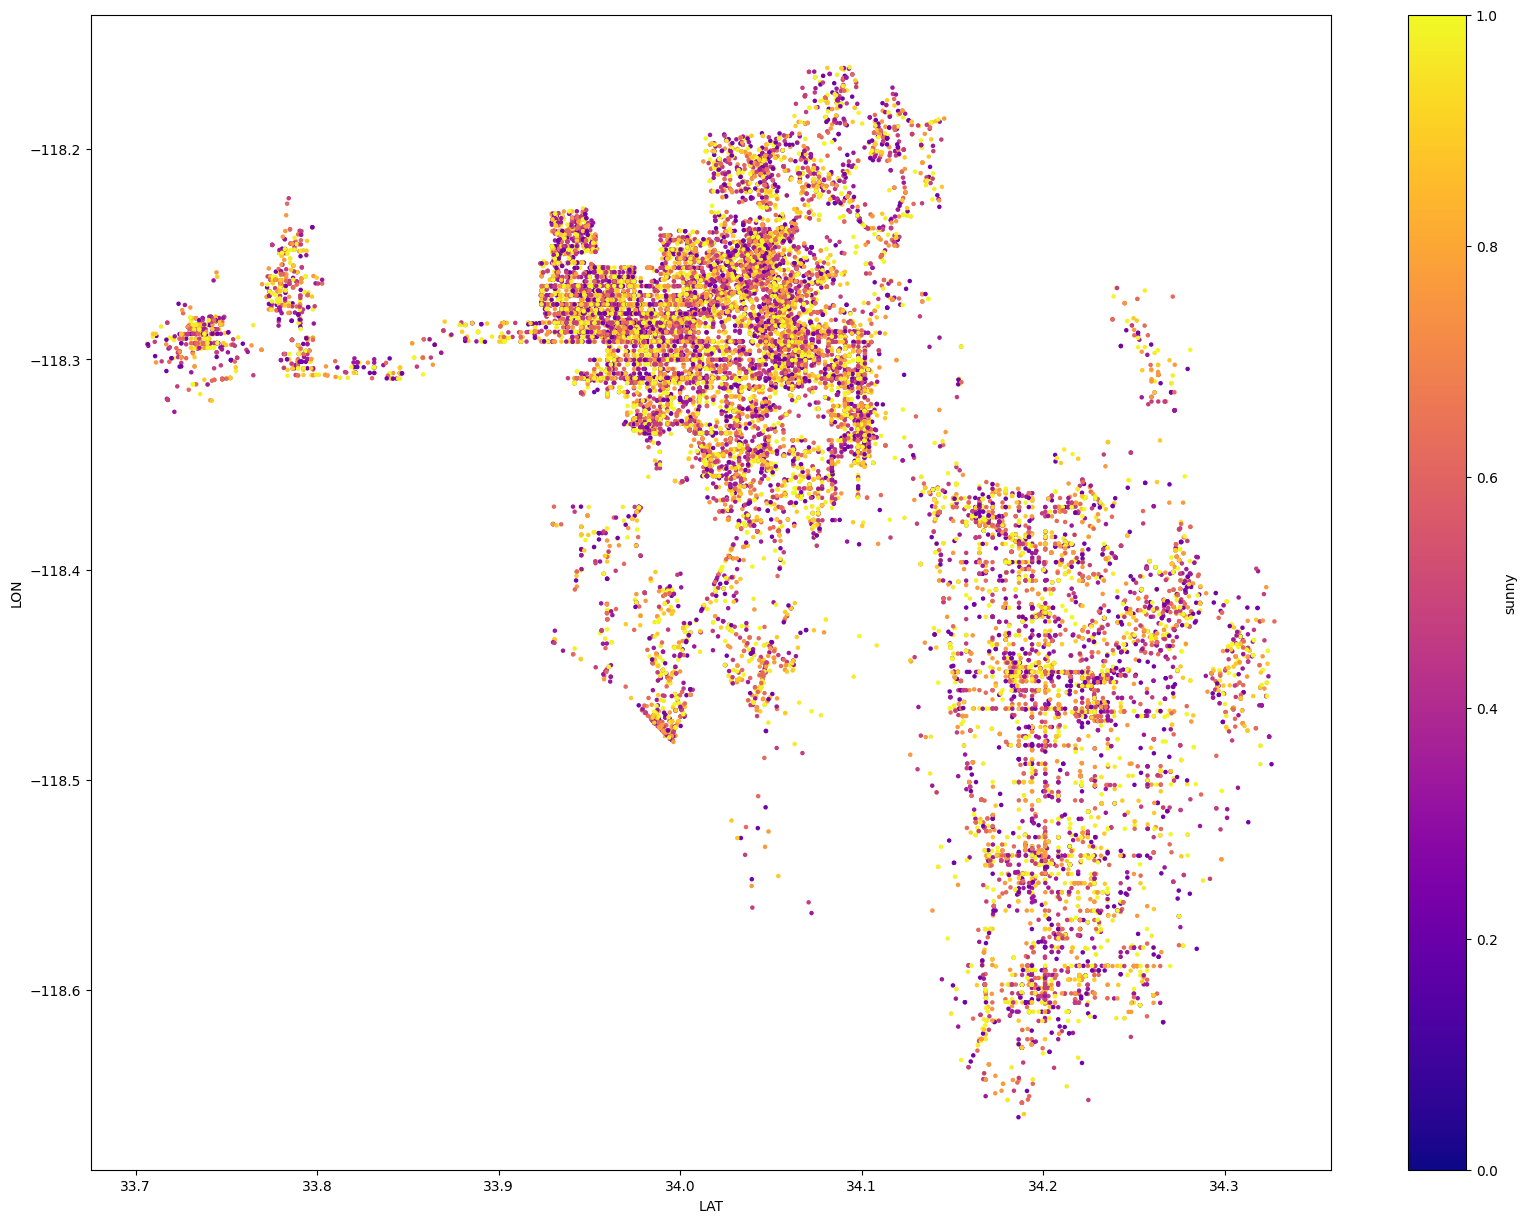

In [ ]:
geo_crime_full[(geo_crime_full["Crm Cd Desc"] == "ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT") &
               (((geo_crime_full["hour"] >= 12) & (geo_crime_full["hour"] < 20)) | (geo_crime_full["TIME OCC"] == 2000))].plot(kind = "scatter",
               x = "LAT",
               y = "LON",
               s = 5,
               c = "sunny",
               cmap = "plasma",
               colorbar = True,
               vmin = 0,
               vmax = 1,
               legend = True,
               figsize = (20, 15))
plt.savefig("stats140xp_la_map_weapon_12_to_8.png")

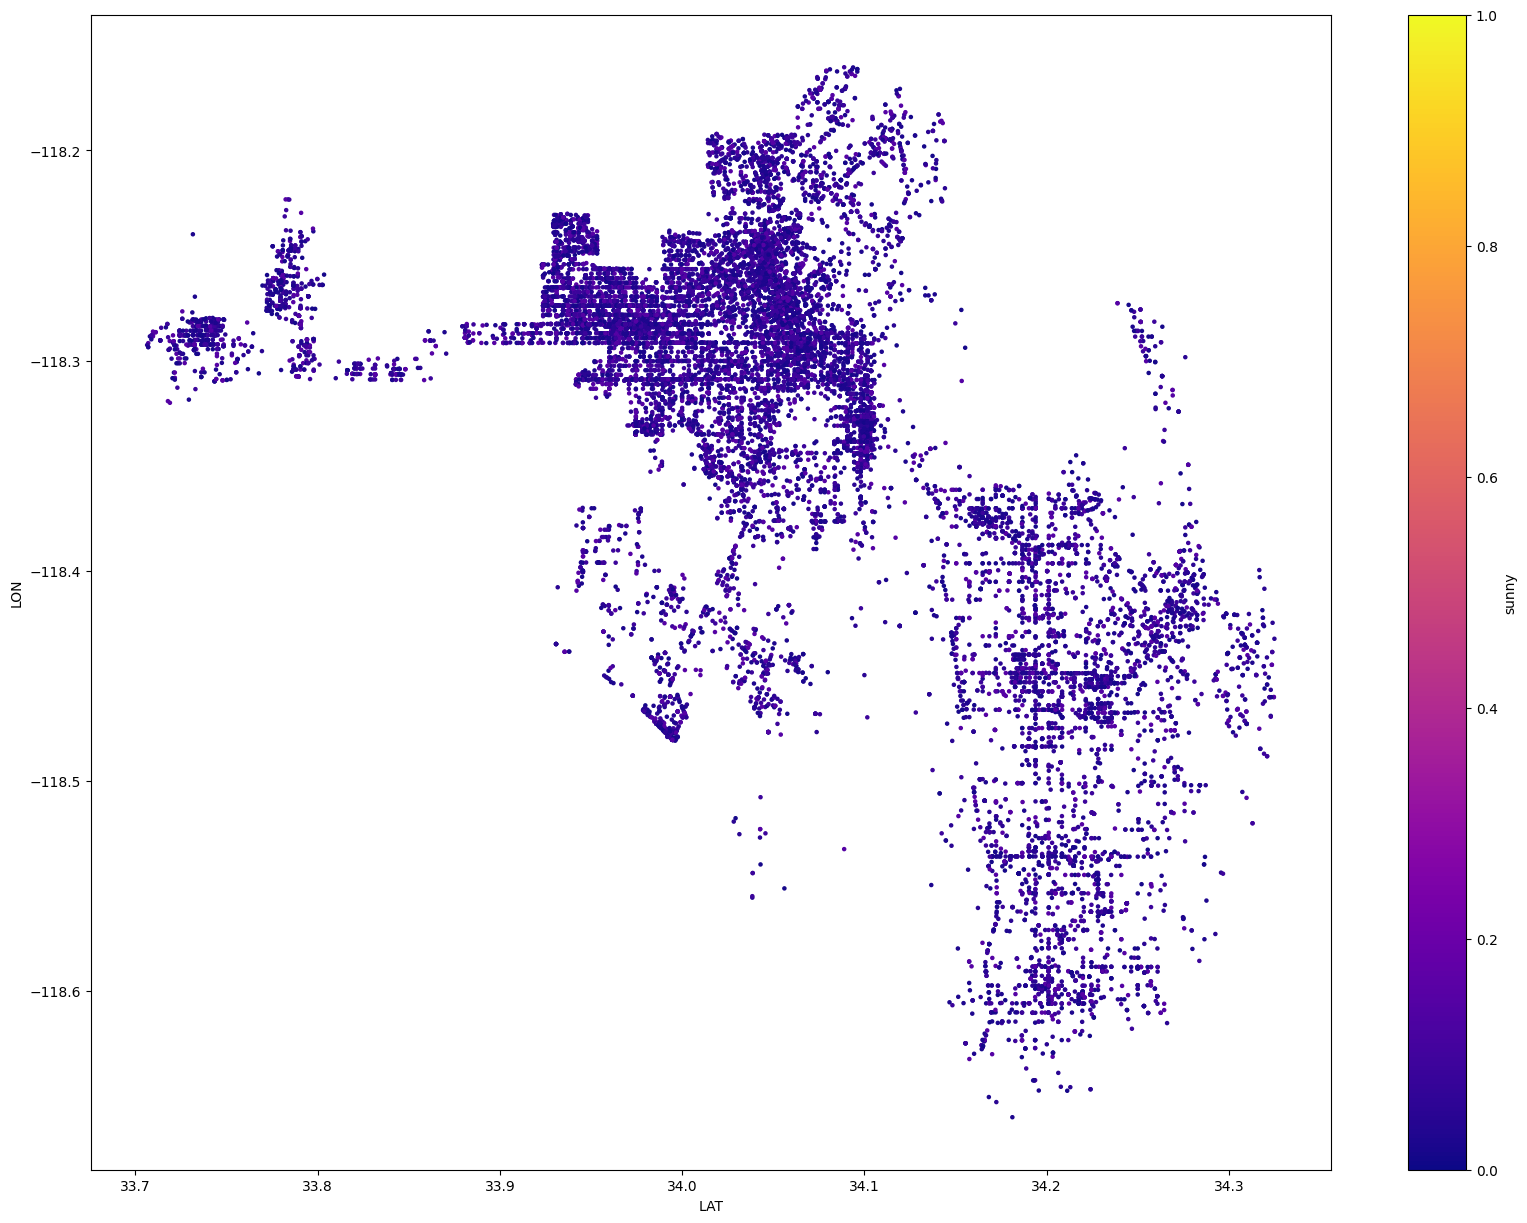

In [ ]:
geo_crime_full[(geo_crime_full["Crm Cd Desc"] == "ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT") &
               (((geo_crime_full["hour"] >= 20) | (geo_crime_full["hour"] < 5)) | (geo_crime_full["TIME OCC"] == 500))].plot(kind = "scatter",
               x = "LAT",
               y = "LON",
               s = 5,
               c = "sunny",
               cmap = "plasma",
               colorbar = True,
               vmin = 0,
               vmax = 1,
               legend = True,
               figsize = (20, 15))
plt.savefig("stats140xp_la_map_weapon_8_to_5.png")

#### Now we do this for criminal homicide, the same process

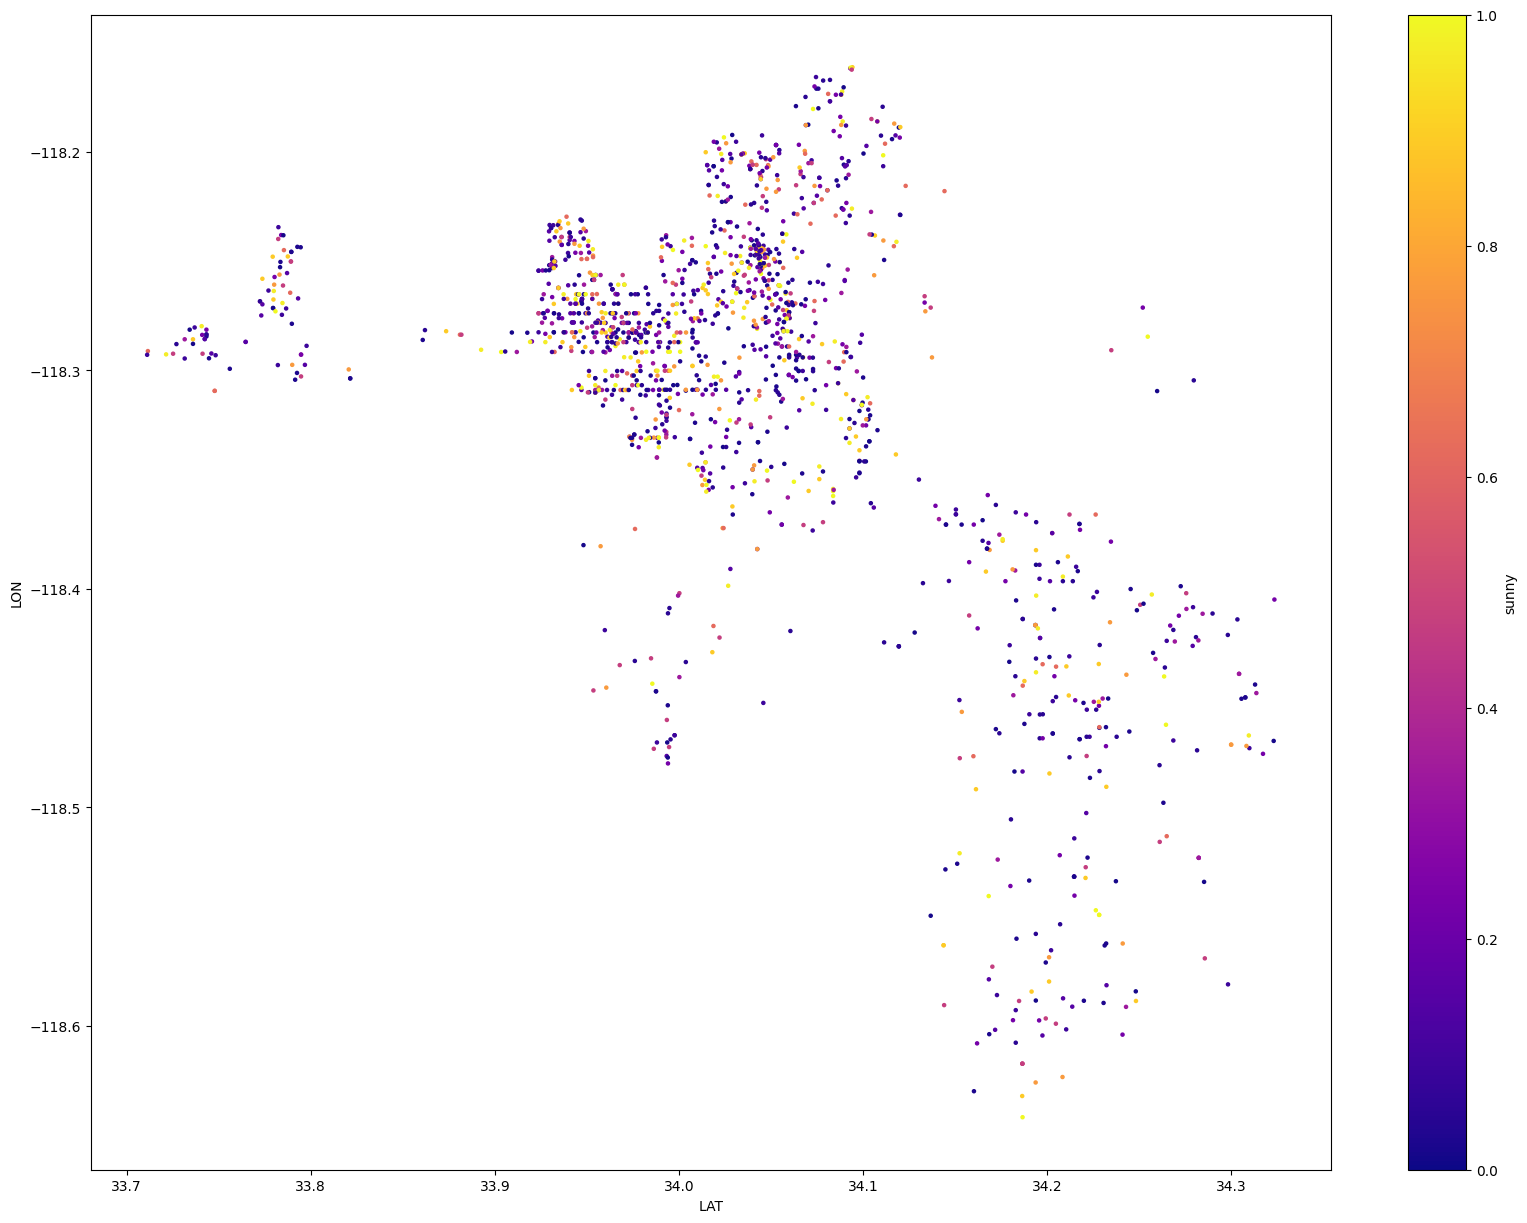

In [ ]:
geo_crime_full[((geo_crime_full["Crm Cd Desc"] == "CRIMINAL HOMICIDE"))].plot(kind = "scatter",
               x = "LAT",
               y = "LON",
               s = 5,
               c = "sunny",
               cmap = "plasma",
               colorbar = True,
               vmin = 0,
               vmax = 1,
               legend = True,
               figsize = (20, 15))
plt.savefig("stats140xp_la_map_homicide_full.png")

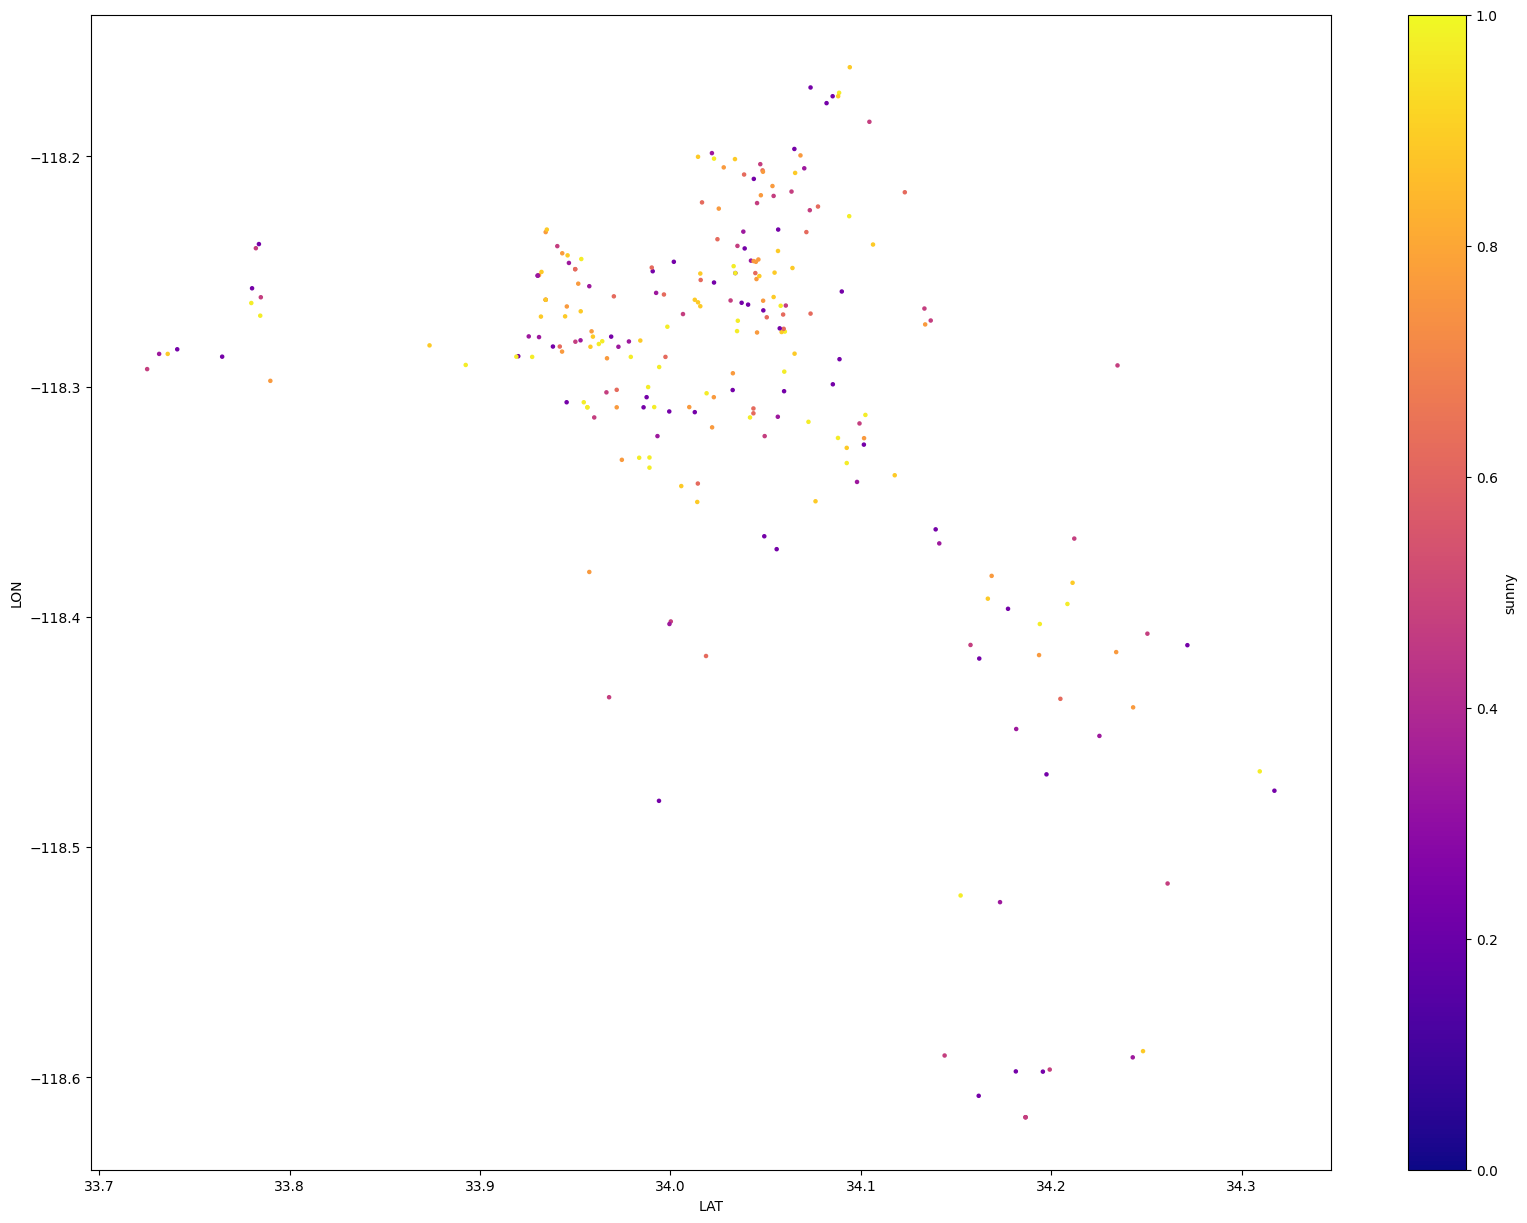

In [ ]:
geo_crime_full[(geo_crime_full["Crm Cd Desc"] == "CRIMINAL HOMICIDE") &
               (((geo_crime_full["hour"] >= 5) & (geo_crime_full["hour"] < 12)) | (geo_crime_full["TIME OCC"] == 1200))].plot(kind = "scatter",
               x = "LAT",
               y = "LON",
               s = 5,
               c = "sunny",
               cmap = "plasma",
               colorbar = True,
               vmin = 0,
               vmax = 1,
               legend = True,
               figsize = (20, 15))
plt.savefig("stats140xp_la_map_homicide_5_to_12.png")

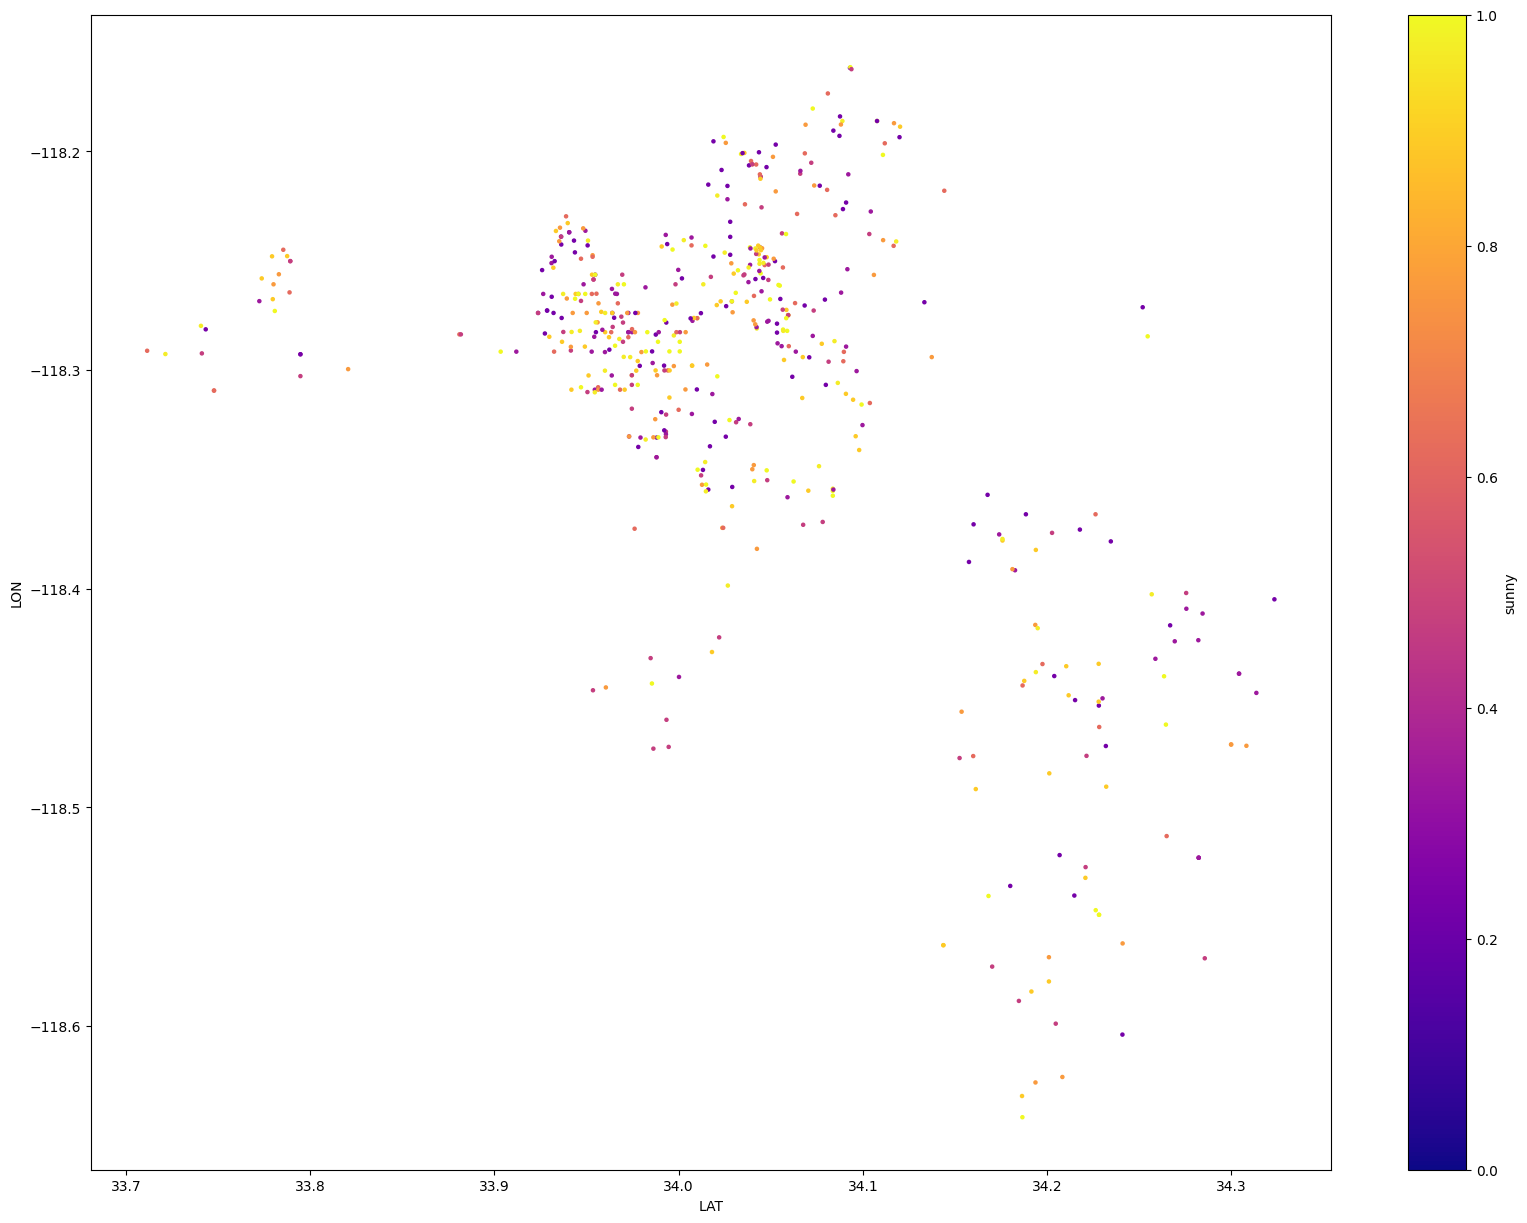

In [ ]:
geo_crime_full[(geo_crime_full["Crm Cd Desc"] == "CRIMINAL HOMICIDE") &
               (((geo_crime_full["hour"] >= 12) & (geo_crime_full["hour"] < 20)) | (geo_crime_full["TIME OCC"] == 2000))].plot(kind = "scatter",
               x = "LAT",
               y = "LON",
               s = 5,
               c = "sunny",
               cmap = "plasma",
               colorbar = True,
               vmin = 0,
               vmax = 1,
               legend = True,
               figsize = (20, 15))
plt.savefig("stats140xp_la_map_homicide_12_to_8.png")

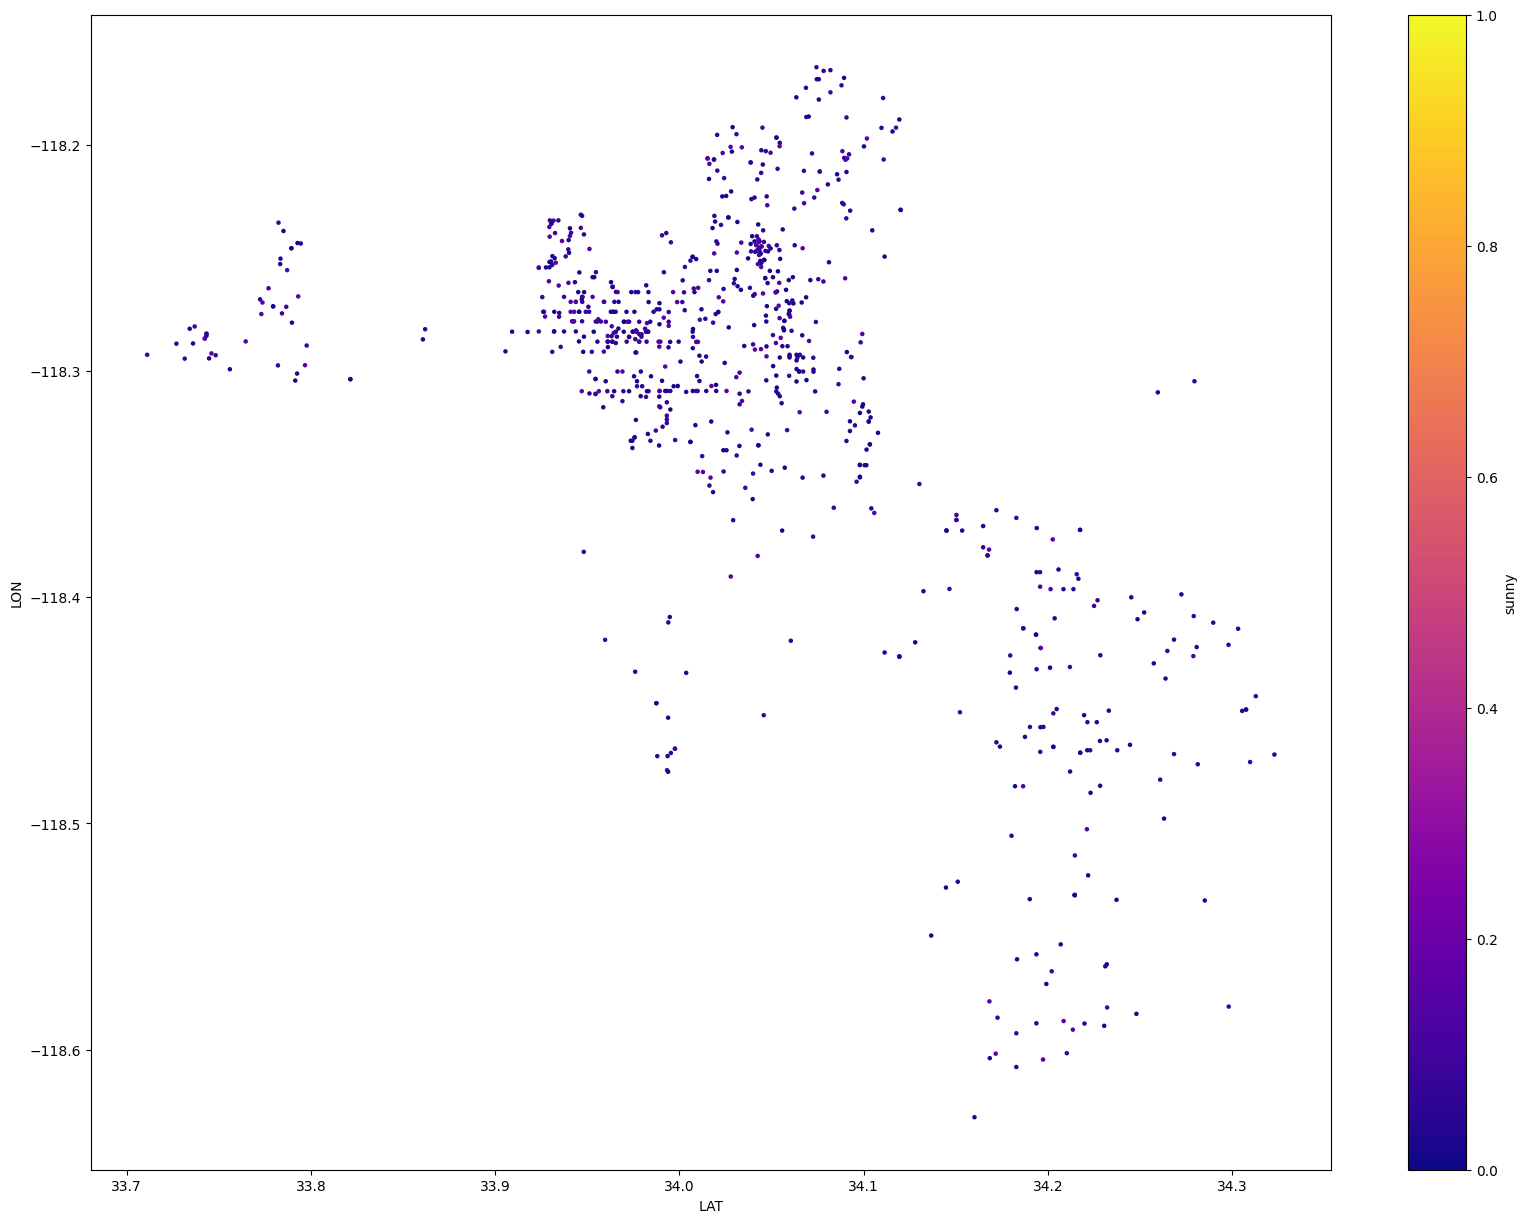

In [ ]:
geo_crime_full[(geo_crime_full["Crm Cd Desc"] == "CRIMINAL HOMICIDE") &
               (((geo_crime_full["hour"] >= 20) | (geo_crime_full["hour"] < 5)) | (geo_crime_full["TIME OCC"] == 500))].plot(kind = "scatter",
               x = "LAT",
               y = "LON",
               s = 5,
               c = "sunny",
               cmap = "plasma",
               colorbar = True,
               vmin = 0,
               vmax = 1,
               legend = True,
               figsize = (20, 15))
plt.savefig("stats140xp_la_map_homicide_8_to_5.png")

#### This process is also done for the subset that focuses on rape

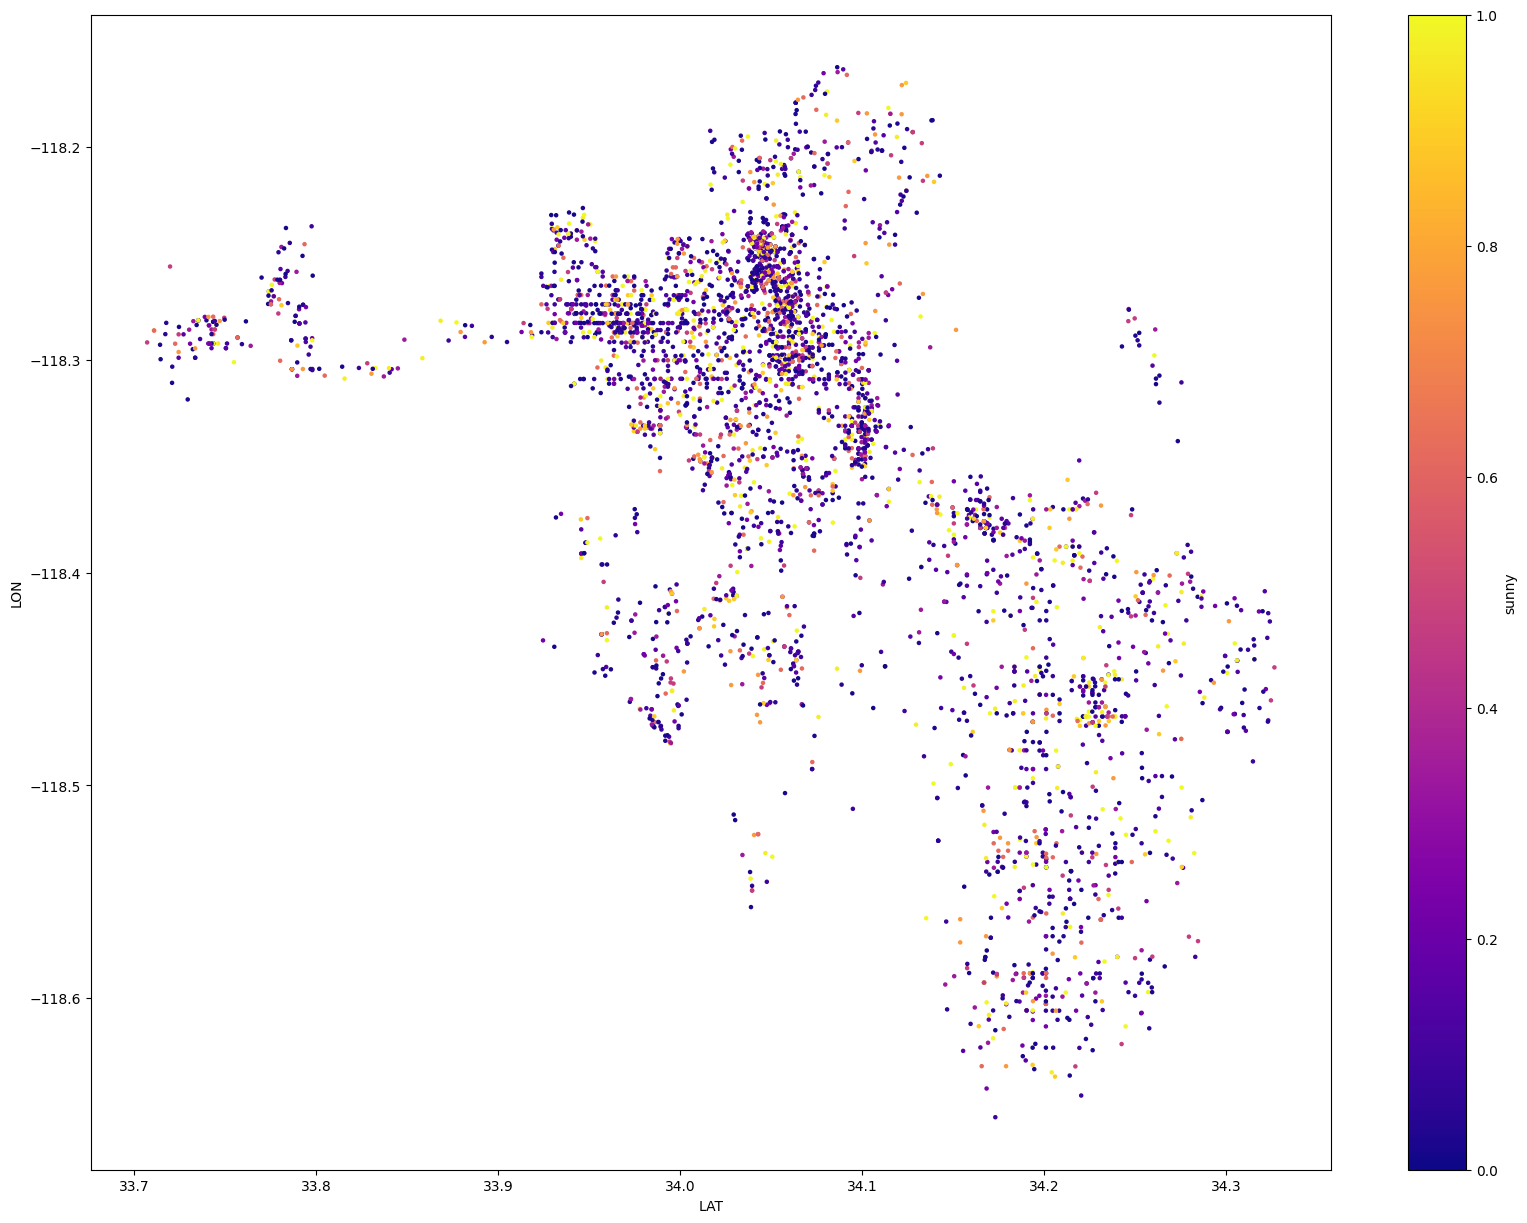

In [ ]:
geo_crime_full[((geo_crime_full["Crm Cd Desc"] == "RAPE, ATTEMPTED") | (geo_crime_full["Crm Cd Desc"] == "RAPE, FORCIBLE"))].plot(kind = "scatter",
               x = "LAT",
               y = "LON",
               s = 5,
               c = "sunny",
               cmap = "plasma",
               colorbar = True,
               vmin = 0,
               vmax = 1,
               legend = True,
               figsize = (20, 15))
plt.savefig("stats140xp_la_map_rape_full.png")

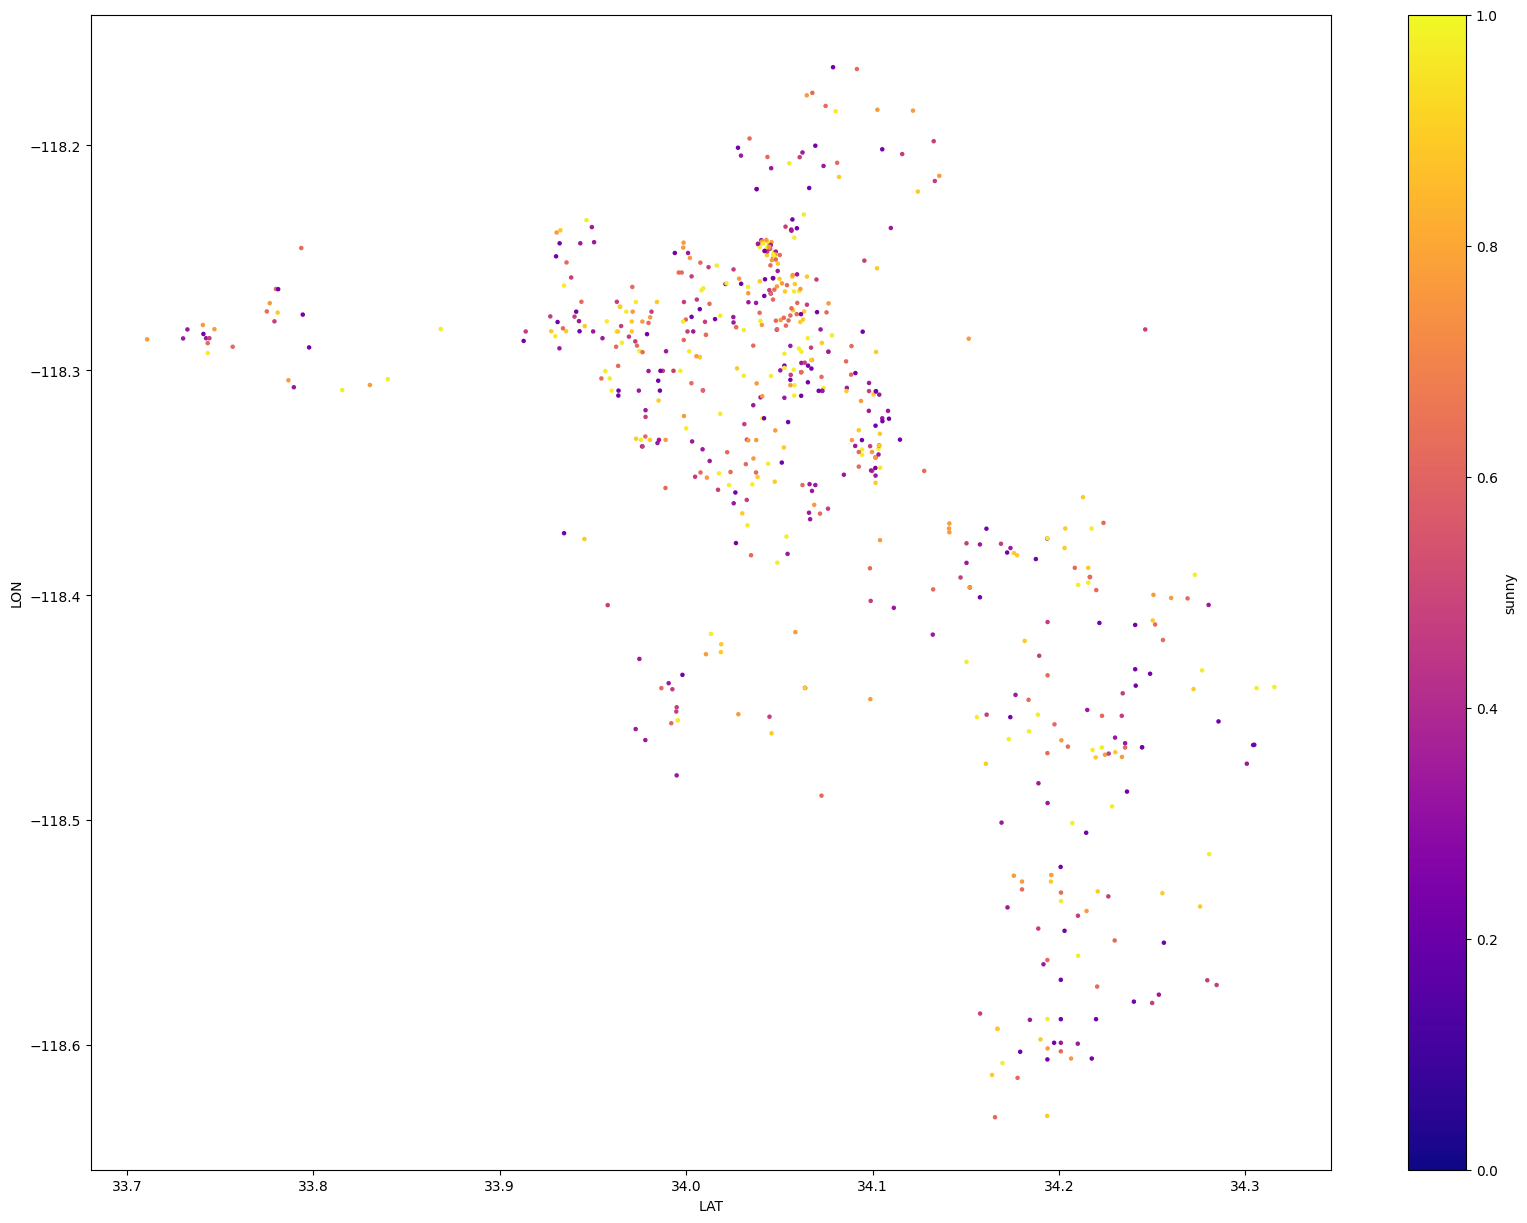

In [ ]:
geo_crime_full[((geo_crime_full["Crm Cd Desc"] == "RAPE, ATTEMPTED") | (geo_crime_full["Crm Cd Desc"] == "RAPE, FORCIBLE")) &
               (((geo_crime_full["hour"] >= 5) & (geo_crime_full["hour"] < 12)) | (geo_crime_full["TIME OCC"] == 1200))].plot(kind = "scatter",
               x = "LAT",
               y = "LON",
               s = 5,
               c = "sunny",
               cmap = "plasma",
               colorbar = True,
               vmin = 0,
               vmax = 1,
               legend = True,
               figsize = (20, 15))
plt.savefig("stats140xp_la_map_rape_5_to_12.png")

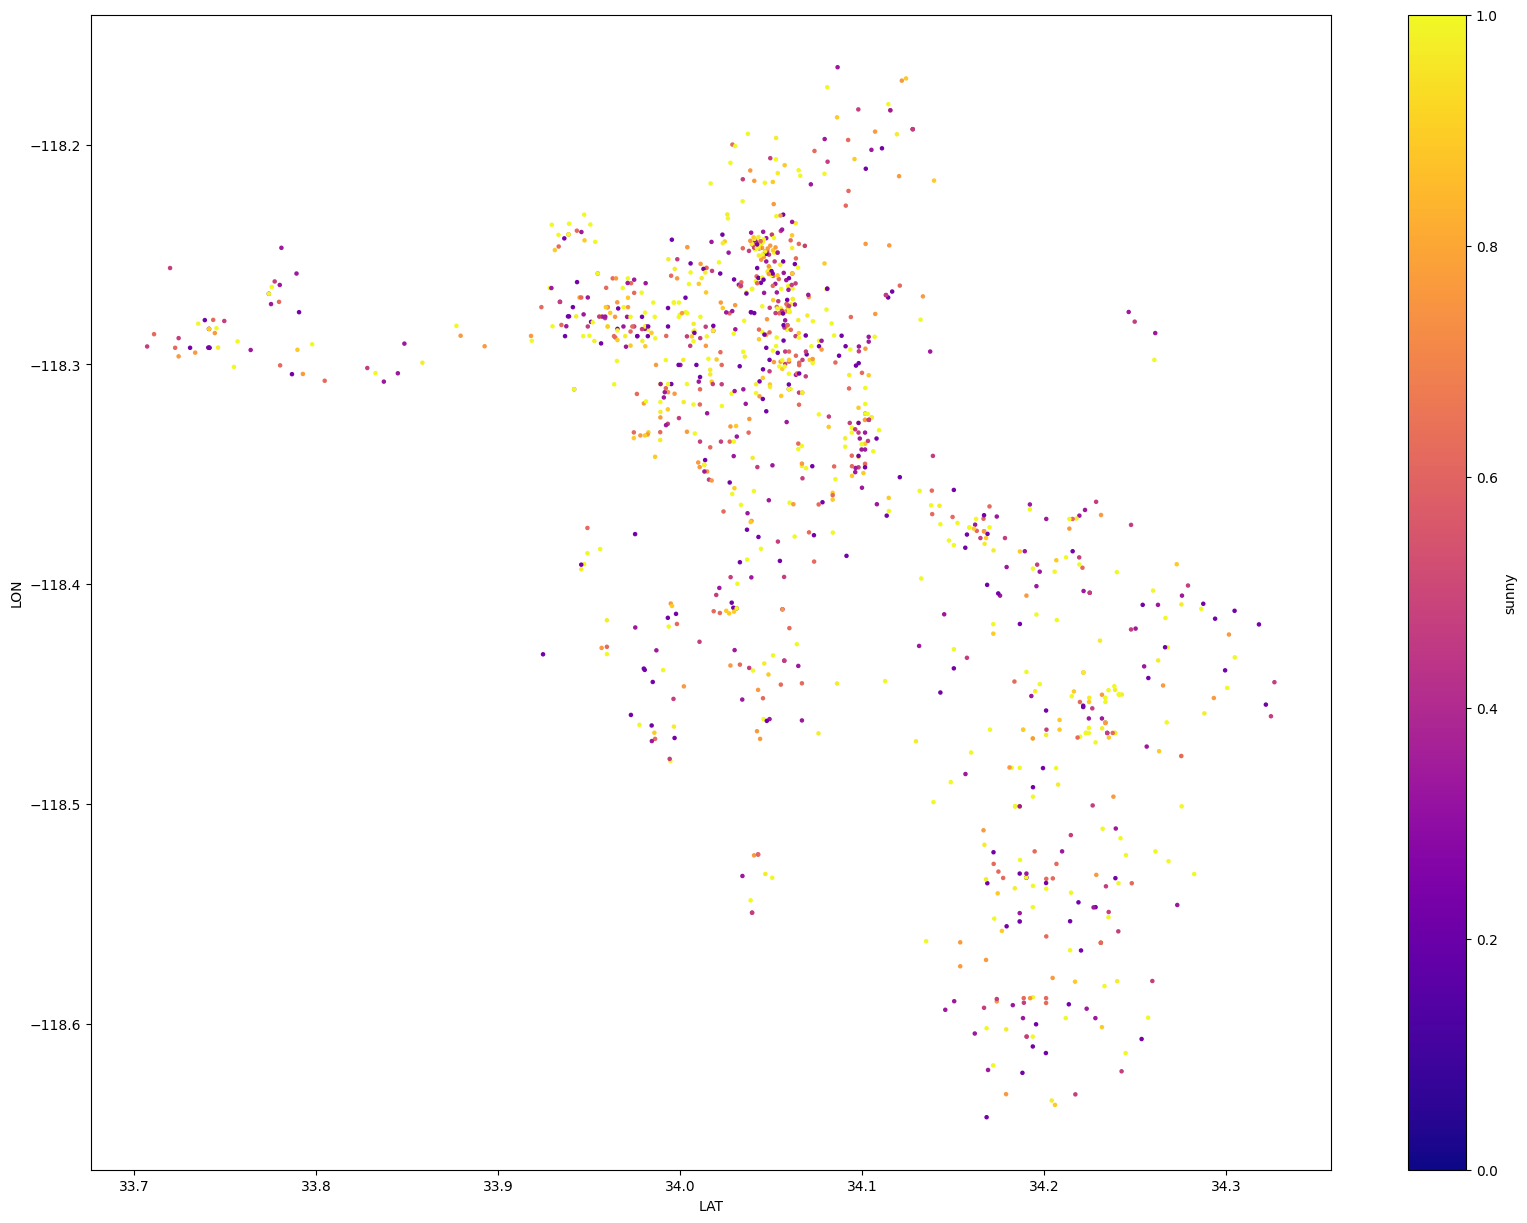

In [ ]:
geo_crime_full[((geo_crime_full["Crm Cd Desc"] == "RAPE, ATTEMPTED") | (geo_crime_full["Crm Cd Desc"] == "RAPE, FORCIBLE")) &
               (((geo_crime_full["hour"] >= 12) & (geo_crime_full["hour"] < 20)) | (geo_crime_full["TIME OCC"] == 2000))].plot(kind = "scatter",
               x = "LAT",
               y = "LON",
               s = 5,
               c = "sunny",
               cmap = "plasma",
               colorbar = True,
               vmin = 0,
               vmax = 1,
               legend = True,
               figsize = (20, 15))
plt.savefig("stats140xp_la_map_rape_12_to_8.png")

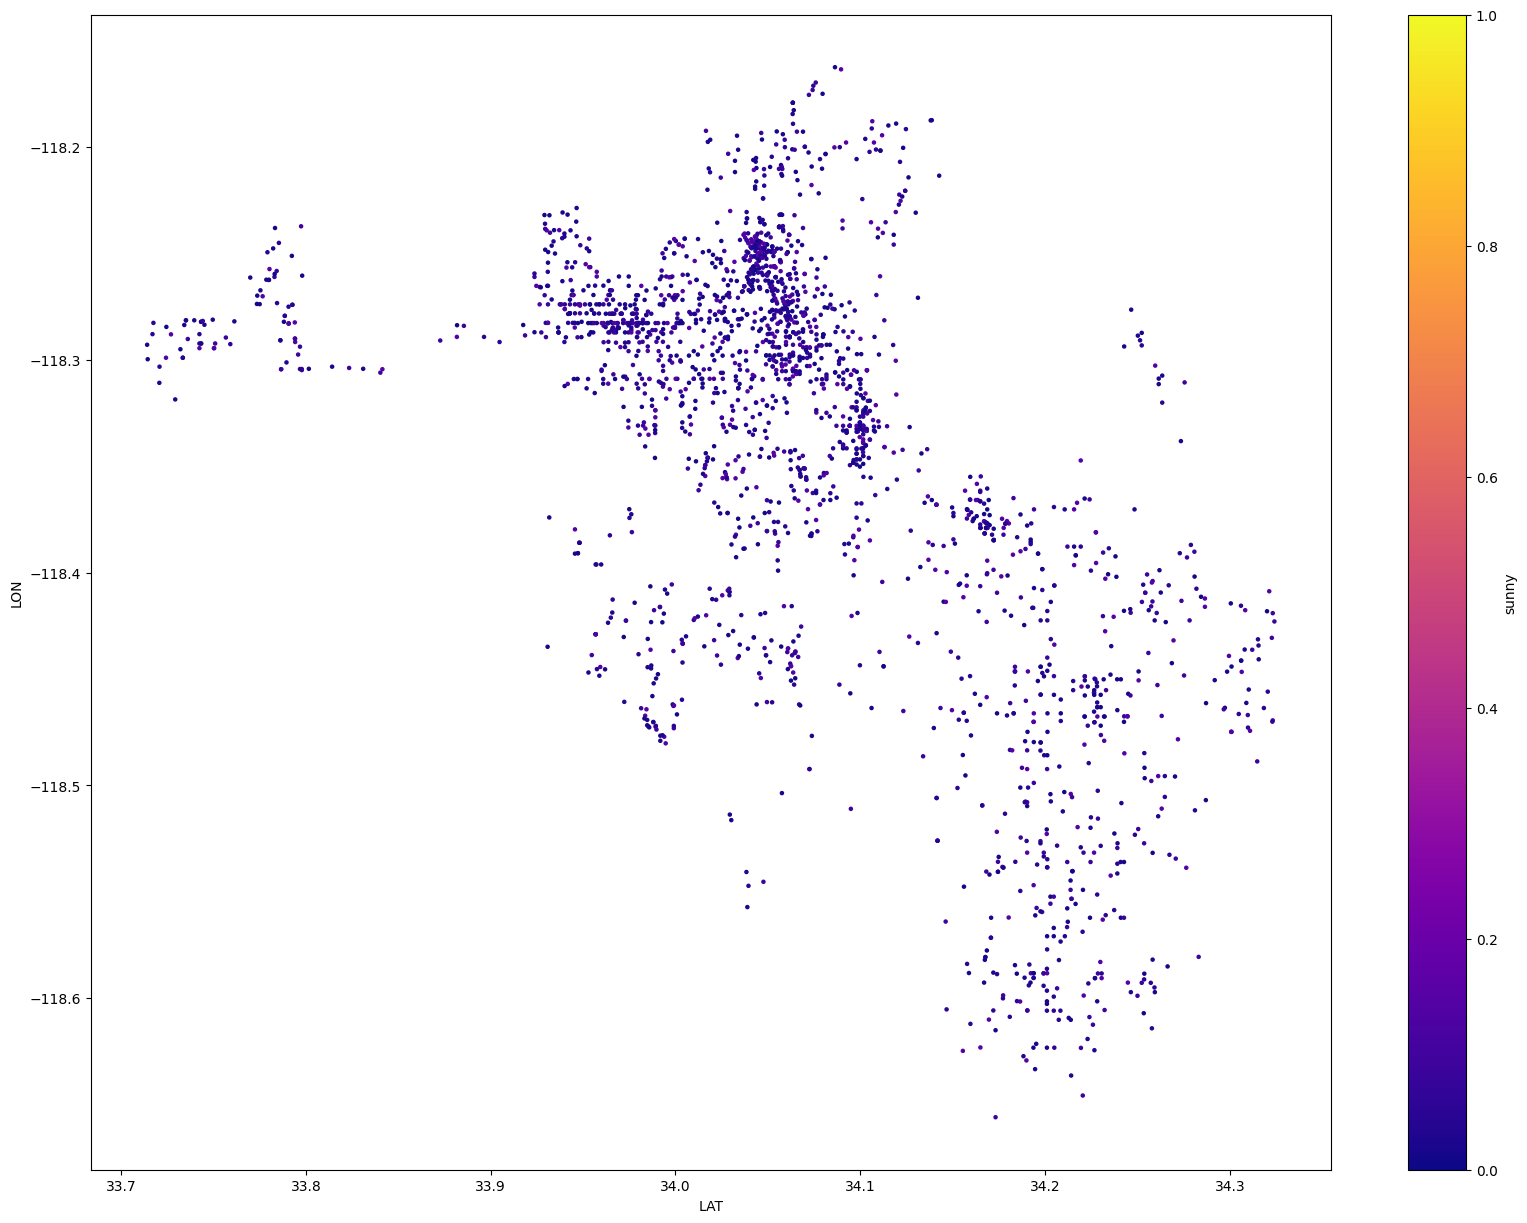

In [ ]:
geo_crime_full[((geo_crime_full["Crm Cd Desc"] == "RAPE, ATTEMPTED") | (geo_crime_full["Crm Cd Desc"] == "RAPE, FORCIBLE")) &
               (((geo_crime_full["hour"] >= 20) | (geo_crime_full["hour"] < 5)) | (geo_crime_full["TIME OCC"] == 500))].plot(kind = "scatter",
               x = "LAT",
               y = "LON",
               s = 5,
               c = "sunny",
               cmap = "plasma",
               colorbar = True,
               vmin = 0,
               vmax = 1,
               legend = True,
               figsize = (20, 15))
plt.savefig("stats140xp_la_map_rape_8_to_5.png")